<a href="https://colab.research.google.com/github/bindulakhanpal12/Demo-Ant/blob/main/Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1
## Coin Toss and Betting


#Question 1
##Coin Toss and Betting

We are given a function coin_toss that simulates a single coin toss.

The function coin_trial simulates a trial of 100 coin tosses by calling the coin_toss function each time.

Note that a fair coin is supposed to yield 50 heads and 50 tails. However, that is not always the case. If you toss the coin 100 times, you might get fewer or more than 50 heads.

Now, what if you repeat the experiment 10, 100, 1000... 10000 times? You will observe that the average number of heads will converge close to 50.

The simulate function simulates this repeating experiment. If you call simulate with n = 1, it is equivalent to 100 coin tosses. If you call it with n = 10, you repeat a trial of 100 coin tosses 10 times.

There is a fascinating probability theory at play here, which you will learn about in the next class. However, even without knowing the theory, one can verify this through simulation.

In [ ]:
import random
def coin_toss():
  if random.random() <= 0.5:
    return 1
  return 0

def coin_trial():
  heads = 0
  for i in range(100):
      heads +=coin_toss()
  return heads
def simulate(n):
    trials = []
    for i in range(n):
        trials.append(coin_trial())
    return(sum(trials)/n)

In [ ]:
simulate(1)

51.0

In [ ]:
simulate(10)

48.7

In [ ]:
simulate(100)

50.45

In [ ]:
simulate(1000)

50.17

In [ ]:
simulate(10000)

50.0077

Try simulating this 100-coin toss 10, 100, 1000, 10000 times and notice if the average number of heads you are getting is approaching close to 50. Can you tell intuitively why this happens?


## Betting offer

Your friend suggests a fair coin game with the following rules: you will keep tossing the coin until heads comes up. For every tails that appears, you owe your friend `$10`. However, if a head comes up, your friend will pay you `$100`.

The sample space for this experiment includes outcomes like {H, TH, TTH, .... TTTTTH ....}. As soon as a head appears, you stop tossing, and your friend pays you `$100`. For each tails that shows up, you need to pay your friend $10. To make a profit, it's beneficial to get a head as quickly as possible.

You can use the simulation method we discussed earlier to simulate a fair coin. Now, leverage the power of simulation.

Write a simulation logic and a trial logic to help you decide whether you should take this bet or not.

Consider this: What if your friend offered you `$100` once a head comes up? Would you take the bet? Write a simulation function to decide.

In [ ]:
import random
def simulate(n, recieve, give):
  if n == 0:
    return recieve-0
  trials = []
  for index in range(n):
    numberofTails=0
    toss=coin_toss()
    while toss==0:

      toss=coin_toss()
      numberofTails=numberofTails+1

    trials.append(numberofTails)
  avgTails = sum(trials)/(n) if trials else 0
  return recieve - give*avgTails

simulate(1,15,10)


15.0

In [ ]:
simulate(100,15,10)

6.6

In [ ]:
simulate(1000000,15,10)

5.0018899999999995

This we have done when you get 15 dollar for a head. You get head in the (i+1)th toss. Now, we will do for 100 dollar.

In [ ]:
simulate(1000000,100,10)

90.00839

Simulate these functions the same number of times. You will see that the profit in the 100 dollar case is more. So, as the money given for head increases, the profit increases. You should take the bet. Also, the sooner you get the head, more profit you have.

# Question 2
## Dice Roll

Write a Python function to simulate a casino where two dice are rolled together, and the player wins if there are two six and gets `$100`. What will be the average profit if the casino fee is 5 cents per game?

In [ ]:
import random
def die_throw():
  face=random.randint(1,6)
  return face

In [ ]:
f1=die_throw()
f1


5

In [ ]:
f2=die_throw()
f2

3

In [ ]:
def simulate(n):

  trials = []
  for index in range(n):
    f1=die_throw()

    trials.append(f1)
  return sum(trials)*1.0/n


In [ ]:
simulate(100)

3.43

In [ ]:
simulate(100000)

3.50232

In [ ]:
def simulate(n,win,fee):

  trials = []
  for index in range(n):
    f1=die_throw()
    f2=die_throw()
    count = 0
    while f1!= 6 or f2!=6:

      f1=die_throw()
      f2=die_throw()
      count += 1


    totalfee = fee*count
    profit = win - totalfee
    trials.append(profit)
  return sum(trials)*1.0/n








In [ ]:
win = 100
fee = 5
print('The profit is',simulate(3,win, fee))




The profit is -201.66666666666666


In [ ]:
print('The profit is',simulate(100,win, fee))



The profit is -85.15


In [ ]:
print('The profit is',simulate(100000,win, fee))



The profit is -75.596


Average # trials needed is 1/36

win = 100 - 100*5/36

Derivation https://math.stackexchange.com/questions/3713648/expected-number-of-rolling-a-pair-of-dice-to-generate-12

# Question 3
## Covid Test Data
Cure Diagnostics is conducting COVID tests on people. They have collected data on COVID tests conducted over the last week. As an analyst at Cure Diagnostics, you are tasked with analyzing this data.

You have been provided with COVID test data for 100 patients who underwent both RT-PCR and Fast Tests. The data includes information on whether the patients were actually infected, as well as their gender. Each column has a binary entry:

`covid_fast_kit: 0 - COVID Negative, 1 - COVID Positive`

`covid_rt_pcr: 0 - COVID Negative, 1 - COVID Positive`

`actual_diagnostic: 0 - COVID Negative, 1 - COVID Positive`

`Sex: 0 - Male, 1 - Female`









In [ ]:
from google.colab import files
data_to_load = files.upload()

TypeError: ignored

In [ ]:
import pandas as pd

df= pd.read_csv("covid.csv")

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.size


### Given this data you need to figure out the following.

Cure Diagnostics gives out free medicine kits to COVID patients who are actually infected. Given they have 100 patients coming in every week, how many free medicine kits should they prepare for next week, given the data above? Who is more likely to be COVID infected - Male or Female?

The covid_rt_pcr test takes 48 hours to get results. Cure Diagnostics is planning to introduce the covid_fast_kit test, which reduces testing time from 48 hours to 40 minutes. Both the covid_rt_pcr and covid_fast_kit tests were done last week for each patient.

i. If a patient has tested positive using the covid_fast_kit, what is the probability that he or she is actually infected?

ii. If a patient has tested positive using the covid_rt_pcr, what is the probability that he or she is actually infected?

From i. and ii., what will you inform the patients about the trade-off?




In [ ]:
df["actual_diagnostic"].sum()/len(df["actual_diagnostic"])

0.49

49% of the people tested actually have been positive. So the number of medicine kit required is 49.

In [ ]:
gender = df.groupby(["sex"])["actual_diagnostic"].sum().reset_index()
gendertotal = df.groupby(["sex"])["actual_diagnostic"].size().reset_index(name = 'count')
gender = gender.merge(gendertotal, on = 'sex')
gender['prob_infected'] = gender['actual_diagnostic']/gendertotal['count']
gender

,sex,actual_diagnostic,count,prob_infected
0,0,30,66,0.454545
1,1,19,34,0.558824


We see that 49 of the people have been actually diagnosed as covid positive, out of them 30 are men are 19 are female. The ratio of male with respect to covid positive diagnosis is quite more than that of females.

Therefore, males are more likely to be covid infected.

In [ ]:
df.groupby(["covid_fast_kit"])["actual_diagnostic"].sum()

covid_fast_kit
0    30
1    19
Name: actual_diagnostic, dtype: int64

P(covid_fast_kit tested positive | actually infected)=N(covid_fast_kit tested positive AND actually infected)/N(actually infected)=19/49=0.387755

In [ ]:
prob1=(df.groupby(["covid_fast_kit"])["actual_diagnostic"].sum())/df.groupby(["actual_diagnostic"])["actual_diagnostic"].sum()
prob1

covid_fast_kit
0         inf
1    0.387755
Name: actual_diagnostic, dtype: float64

In [ ]:
df.groupby(["covid_rt_pcr"])["actual_diagnostic"].sum()

covid_rt_pcr
0    15
1    34
Name: actual_diagnostic, dtype: int64

P(covid_rt_pcr tested positive | actually infected)=N(covid_rt_pcr tested positive AND actually infected)/N(actually infected)=34/49=0.693878

covid_rt_pcr
0         inf
1    0.693878
Name: actual_diagnostic, dtype: float64

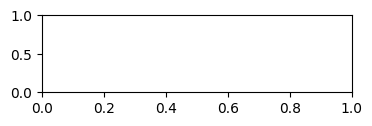

In [ ]:
prob2=(df.groupby(["covid_rt_pcr"])["actual_diagnostic"].sum())/df.groupby(["actual_diagnostic"])["actual_diagnostic"].sum()
prob2

# Question 4
## Infinte monkey Theorem
The infinite monkey theorem states that a monkey hitting keys at random on a typewriter keyboard for an infinite amount of time will almost surely type any given text, such as the complete works of William Shakespeare.

Suppose the typewriter can only type between A-Z. Ignoring punctuation, spacing, and capitalization, write a function that calculates the probability of writing the title "Hamlet."

The text of Hamlet contains approximately 130,000 letters. Can you comment on the chance of the monkey typing out Hamlet by randomly hitting keys on the typewriter?




In [ ]:
import random,string

The chance that the first letter typed is 'h' is 1/26, and the chance that the second letter typed is 'a' is also 1/26, and so on. Therefore, the probability of the first six letters spelling 'hamlet' is

(1/26) × (1/26) × (1/26) × (1/26) × (1/26) × (1/26) = (1/26)^6 = 1/308915776

In [ ]:
def inf_prob(n):
  prob1= (1/26)**n
  return prob1


In [ ]:
inf_prob(6)

3.237128297390679e-09

For any required string of 130,000 letters from the set a-z, the average number of letters that needs to be typed
until the string appears is (rounded) 3.4 × 10^183,946, except in the case that all letters of the required string are equal,
in which case the value is about 4% more, 3.6 × 10^183,946. In that case failure to have the correct string starting from
a particular position reduces with about 4% the probability of a correct string starting from the next position (i.e., for
overlapping positions the events of having the correct string are not independent; in this case there is a positive
correlation between the two successes, so the chance of success after a failure is smaller than the chance of success in
general). The figure 3.4 × 10^183,946 is derived from num1 = 26^130000 by taking the logarithm of both sides: log10(num1) =
1300000×log10(26) = 183946.5352, therefore num = 10^0.5352 × 10^183946 = 3.429 × 10^183946

In [ ]:
import math
def prob():
  num1=26**130000
  l=math.log10( num1 )
  num2=10**(l)
  pr=1/num2
  return pr

In [ ]:
prob()

OverflowError: ignored

# Question 5
#Spam Classification

##Exploring the Dataset

Let's begin by opening the SMSSpamCollection file using the read_csv() function from the pandas package. We're going to use:

- > sep='\t' because the data points are tab-separated.
- > header=None because the dataset doesn't have a header row.
- > names=['Label', 'SMS'] to name the columns.

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip smsspamcollection.zip


--2023-04-09 10:01:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 203415 (199K) [application/x-httpd-php]
Saving to: ‘smsspamcollection.zip’

smsspamcollection.z 100%[===================>] 198.65K   778KB/s    in 0.3s    

2023-04-09 10:01:30 (778 KB/s) - ‘smsspamcollection.zip’ saved [203415/203415]

Archive:  smsspamcollection.zip
  inflating: SMSSpamCollection       
  inflating: readme                  


In [ ]:
import pandas as pd

sms_spam = pd.read_csv('SMSSpamCollection', sep='\t',
header=None, names=['Label', 'SMS'])

print(sms_spam.shape)
sms_spam.head()

(5572, 2)


,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
sms_spam[sms_spam['Label'] == 'spam']

,Label,SMS
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [ ]:
sms_spam[sms_spam['Label'] == 'ham']

,Label,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5565,ham,Huh y lei...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...



Given the above data we want to predict if a given sms is **spam** or not (also called **ham**).
One way to think about this problem is using Bayes' Theorem. In terms of probability we want to find out the $P(Spam | SMS)$

\begin{align}
P(Spam | SMS) = \frac{P(Spam) P(SMS|Spam) } {P(Spam) P(SMS|Spam) + P(Ham) P(SMS|Ham)}
\end{align}
where $P(Spam)$ is the prior probability of an sms being spam. $P(SMS|Spam)$ is the likelihood of a sms being spam.

Note that we need to estimate $P(Spam | SMS)$ which is the posterior probability of a SMS being spam.


What is the prior probability of a message to be Spam?
What is $P(Spam)$

\begin{align}
P(Spam) = \frac{\#Spam\_SMS}{\#SMS}
\end{align}

In the next cell write code for calculating $P(Spam)$

In [ ]:
## your code here
sms_spam['Label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

What is $P(Ham)$?

In [ ]:
## your code here
sms_spam['Label'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

**Training and Test Set**

In machine learning, we need to split our dataset into a training set and a test set. We'll use 80% of the data for training and the remaining 20% for testing.

Training data is the set on which we need to estimate the probabilities. We will apply this estimate to decide whether a message is spam or ham in the test set and measure accuracy.

Can you explain why we need to split the data into a training and test set?

In [ ]:
# Randomize the dataset
data_randomized = sms_spam.sample(frac=1, random_state=1)

# Calculate index for split
training_test_index = round(len(data_randomized) * 0.8)

# Split into training and test sets
training_set = data_randomized[:training_test_index].reset_index(drop=True)
test_set = data_randomized[training_test_index:].reset_index(drop=True)

print(training_set.shape)
print(test_set.shape)

(4458, 2)
(1114, 2)


Next we need to calculate $P(SMS|Spam)$. This probability will tell us what is the likelihood of a SMS being spam.

This is tricky. Why?

First we need to understand what a **SMS** is made of. A **SMS** is sequence of words. We can represent a SMS as sequence of words $w_1, w_2 ... w_n$, where $w_i$ is the $i^{th}$  word.

When we want to know the likelihood of a

\begin{align}
P(SMS|Spam) = P(w_1, w_2 \ldots w_n|Spam)
\end{align}

$P(w_1, w_2 \ldots w_n|Spam) $ looks scary!

How do we calculate this?

Let's understand this a little more. Let's take two SMS and understand this:

`Spam SMS - "WINNER!! As a valued network customer you have"`

`Ham SMS - "Even my brother is not like to speak with me..."`

If we look at the words in the SMS we can tell which one is Spam and which one is Ham.

But how are we really saying this?

-> `By noticing the words in the SMS.`

Notice the first SMS has words like "winner, customer, network" these are more likely to be associated with Spam messages. Where as second sms has words like "brother, speak. me" which are genuine words usually found in personal sms.

Hence the word sequence $w_1, w_2 \ldots w_n$ will be different for Spam and Ham sms and we want to estimate $P(w_1, w_2 \ldots w_n|Spam)$.

Remember probability can be estimated with counts. Let $c$ be the number of times word sequence $w_1, w_2 \ldots w_n$ is found in data and $c_{spam}$ is the number of times it is marked as spam

\begin{align}
P(w_1, w_2 \ldots w_n|Spam) = \frac{c_{spam}}{c}
\end{align}

When $w_1, w_2 \ldots w_n$ = "WINNER!! As a valued network customer you have" then we are trying to see how many times the same sms has come. Ideally this will be very rare that such exact sms comes multiple times so the probability estimates will be incorrect.

To make better estimate we are going to make an assumption. What if the words $w1, w2 \ldots w_n$ are independent?
\begin{align}
P(w_1, w_2 \ldots w_n|Spam) = P(w_1|Spam)P(w_2|Spam) \ldots P(w_n|Spam)
\end{align}

This follows from multiplicative rule of probability and independence assumption.
Now if we want to calculate the likelihood of a SMS is spam then we can calculate
\begin{align}
P(w_i|Spam) = \frac{N_{i|spam}}{N_{spam}}
\end{align}
where $N_{spam}$ is the number spam emails in the training set and $N_{i|spam}$ is the number of times the word is associated with a spam email.

So for each word we need to calculate the counts of time it appears in training set, overall and by each SMS type - Spam and Ham.

Then using Bayes' rule we can calculate the Posterior.

**Data Cleaning**

When a new message comes in, our multinomial Naive Bayes algorithm will make the classification based on the results.

To calculate all these probabilities, we'll first need to perform a bit of data cleaning to bring the data into a format that allows us to easily extract all the information we need. Currently, our training and test sets have this format (the messages below are fictitious to make the example easier to understand):


In [ ]:
training_set['Label'].value_counts(normalize=True)

ham     0.86541
spam    0.13459
Name: Label, dtype: float64

In [ ]:
test_set['Label'].value_counts(normalize=True)

ham     0.868043
spam    0.131957
Name: Label, dtype: float64

In [ ]:
# Before cleaning
training_set.head(3)

,Label,SMS
0,ham,"Yep, by the pretty sculpture"
1,ham,"Yes, princess. Are you going to make me moan?"
2,ham,Welp apparently he retired


**Letter Case and Punctuation**

Let's begin the data cleaning process by removing the punctuation and making all the words lowercase.

In [ ]:
# After cleaning
training_set['SMS'] = training_set['SMS'].str.replace(
   '\W', ' ') # Removes punctuation
training_set['SMS'] = training_set['SMS'].str.lower()
training_set.head(3)

<ipython-input-27-82891ec54ccc>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  training_set['SMS'] = training_set['SMS'].str.replace(


,Label,SMS
0,ham,yep by the pretty sculpture
1,ham,yes princess are you going to make me moan
2,ham,welp apparently he retired


**Creating the Vocabulary**

Vocabulary is the set of word in the training set. Vocabulary is like dictionary, it is collection of all possible set of words in the training set. First we need to keep track of all words and post that we can calculate counts for each.
We will store the set of all unique words in training data in a list or dictionary in python

In [ ]:

#your code here
training_set['SMS'] = training_set['SMS'].str.split()

vocabulary = []
for sms in training_set['SMS']:
   for word in sms:
      vocabulary.append(word)

vocabulary = list(set(vocabulary))

It looks like there are 7,783 unique words in all the messages of our training set.

In [ ]:
#expected answer if vocabulary is your list or
len(vocabulary)

7783

**How do we count?**

Suppose we have 3 sentence "secret prize! secret prize! claim now", "coming to my secret party?" and "secret prize claim winner"

Then for each words we will keep a list of size 3 - same as the number of sentence.

Note that in the cell below, for the first word 'secret,' it occurs twice in the first sentence, but we still count 1 for it. It occurs once in the second sentence and the third sentence, so it has 1 in all the indices. The word 'winner' appears only in the last sentence and has an entry in the last index.

Similarly for other words, we keep the count.

We have total 7783 words and 4458 sentences. So for each word we need to keep a list of 4458 where each index will store how many times the word appears in that sentence.


In [ ]:
word_counts_per_sms = {'secret': [1,1,1],
                       'prize': [1,0,1],
                       'claim': [1,0,1],
                       'now': [1,0,1],
                       'coming': [0,1,0],
                       'to': [0,1,0],
                       'my': [0,1,0],
                       'party': [0,1,0],
                       'winner': [0,0,1]
                      }

word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,secret,prize,claim,now,coming,to,my,party,winner
0,1,1,1,1,0,0,0,0,0
1,1,0,0,0,1,1,1,1,0
2,1,1,1,1,0,0,0,0,1


To create the dictionary we need for our training set, we can use the code below:

We start by initializing a dictionary named word_counts_per_sms, where each key is a unique word (a string) from the vocabulary, and each value is a list of the length of the training set, where each element in that list is a 0.

The code [0] * 5 outputs [0, 0, 0, 0, 0]. So the code [0] * len(training_set['SMS']) outputs a list of the length of training_set['SMS'].

We loop over training_set['SMS'] using the enumerate() function to get both the index and the SMS message (index and sms).

Using a nested loop, we loop over sms (where sms is a list of strings, where each string represents a word in a message).

We increment word_counts_per_sms[word][index] by 1.

In [ ]:
word_counts_per_sms = {unique_word: [0] * len(training_set['SMS']) for unique_word in vocabulary}



#your code here to calculate word_counts_per_sms

for index, sms in enumerate(training_set['SMS']):
   for word in sms:
      word_counts_per_sms[word][index] = 1

Now that we have the dictionary we need, let's do the final transformations to our training set.

In [ ]:
word_counts = pd.DataFrame(word_counts_per_sms)
word_counts.head()

,myself,lingo,term,81303,habit,0089,shakara,signing,wrc,anything,...,cup,tncs,offline,monthlysubscription,eveb,stay,japanese,nightnight,up,clearer
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The Label column is missing, so we'll use the pd.concat() function to concatenate the DataFrame we just built with the DataFrame containing the training set. This way, we'll also have the Label and the SMS columns.

In [ ]:
training_set_clean = pd.concat([training_set, word_counts], axis=1)
training_set_clean.head()

,Label,SMS,myself,lingo,term,81303,habit,0089,shakara,signing,...,cup,tncs,offline,monthlysubscription,eveb,stay,japanese,nightnight,up,clearer
0,ham,"[yep, by, the, pretty, sculpture]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,"[yes, princess, are, you, going, to, make, me,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ham,"[welp, apparently, he, retired]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,[havent],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"[i, forgot, 2, ask, ü, all, smth, there, s, a,...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Calculating Constants First**

Now that we're done with cleaning the training set, we can begin coding the spam filter. The Bayes algorithm will need to answer these two probability questions to be able to classify new messages:

Also, to calculate $P(w_i|Spam)$ and $P(w_i|Ham)$ inside the formulas above, we'll need to use these equations:

$P(w_i|Spam) = \frac{N_{i|Spam} + \alpha}{N_{spam} + \alpha.N_v}$


$P(w_i|Ham) = \frac{N_{i|Ham} + \alpha}{N_{ham} + \alpha.N_v}$

Where $N_v$ is the size of the vocabulary (7785 in our case)
$N_{i|Spam}$ is number of times word $w_i$ is found in spam email and $N_{spam}$ total number of spam email.

Note that a word can appear multiple times in an SMS, but we will only count it as once. There is an advanced version where count is used, but we will only use it if the word is present or absent.

This $\alpha$ is added to account for words that are not seen in the training set but might be in the test set. For them both $N_{i|Spam}$ and $N_{i}$ is 0.
This is added to our previous definition of likelihood to avoid zero probability cases just because a word is not seen in training.



In [ ]:
# Isolating spam and ham messages first
spam_messages = training_set_clean[training_set_clean['Label'] == 'spam']
ham_messages = training_set_clean[training_set_clean['Label'] == 'ham']

# P(Spam) and P(Ham)
p_spam = len(spam_messages) / len(training_set_clean)
p_ham = len(ham_messages) / len(training_set_clean)

# N_Spam
n_spam = len(spam_messages)

# N_Ham

n_ham = len(ham_messages)

# N_Vocabulary
n_vocabulary = len(vocabulary)

# Laplace smoothing
alpha = 1

**Calculating Parameters**

Now that we have the above constant terms, we can calculate `P(wi|Spam)` and `P(wi|Ham)`.

`P(wi|Spam)` and `P(wi|Ham)` will vary depending on the words. For instance,
`P("secret"|Spam) `will have a certain probability value, while `P("cousin"|Spam)` or `P("lovely"|Spam)` will most likely have other values.

Therefore, each parameter will be a conditional probability value associated with each word in the vocabulary.

In [ ]:
# Initiate parameters
parameters_spam = {unique_word:0 for unique_word in vocabulary}
parameters_ham = {unique_word:0 for unique_word in vocabulary}

# Calculate parameters
for word in vocabulary:
   n_word_given_spam = spam_messages[word].sum() # spam_messages already defined
   p_word_given_spam = (n_word_given_spam + alpha) / (n_spam + alpha*n_vocabulary)
   parameters_spam[word] = p_word_given_spam

   n_word_given_ham = ham_messages[word].sum() # ham_messages already defined
   p_word_given_ham = (n_word_given_ham + alpha) / (n_ham + alpha*n_vocabulary)
   parameters_ham[word] = p_word_given_ham

**Classifying A New Message**

Now that we have all our parameters calculated, we can start creating the spam filter. The spam filter is understood as a function that:

Takes a new message as input(w1, w2, ..., wn).

Calculates P(Spam|w1, w2, ..., wn) and P(Ham|w1, w2, ..., wn).

Compares the values of P(Spam|w1, w2, ..., wn) and P(Ham|w1, w2, ..., wn), and:
If P(Ham|w1, w2, ..., wn) > P(Spam|w1, w2, ..., wn), then the message is classified as ham.

If P(Ham|w1, w2, ..., wn) < P(Spam|w1, w2, ..., wn), then the message is classified as spam.

If P(Ham|w1, w2, ..., wn) = P(Spam|w1, w2, ..., wn), then the algorithm may request human help.

Note that some new messages will contain words that are not part of the vocabulary. We will simply ignore these words when we're calculating the probabilities.

Let's start by writing a first version of this function. For the classify() function below, notice that:

-> The input variable message needs to be a string.

-> We perform a bit of data cleaning on the string message:

-> We remove the punctuation using the re.sub() function.

-> We bring all letters to lower case using the str.lower() method.

-> We split the string at the space character and transform it into a Python list using the str.split() method.

-> We calculate p_spam_given_message and p_ham_given_message.

-> We compare p_spam_given_message with p_ham_given_message and then print a classification label.

In [ ]:
import re

def spam_detector(message):
   '''
   message: a string
   '''

   message = re.sub('\W', ' ', message)
   message = message.lower().split()

   p_spam_given_message = p_spam
   p_ham_given_message = p_ham

   for word in message:
      if word in parameters_spam:
         p_spam_given_message *= parameters_spam[word]

      if word in parameters_ham:
         p_ham_given_message *= parameters_ham[word]


   p_given_message = p_spam_given_message + p_ham_given_message

   p_spam_given_message = p_spam_given_message/p_given_message

   p_ham_given_message = p_ham_given_message/p_given_message

   print('P(Spam|message):', p_spam_given_message)
   print('P(Ham|message):', p_ham_given_message)

   if p_ham_given_message > p_spam_given_message:
      print('Label: Ham')
   elif p_ham_given_message < p_spam_given_message:
      print('Label: Spam')
   else:
      print('Equal proabilities, have a human classify this!')

We'll now test the spam filter on two new messages. One message is obviously spam, and the other is obviously ham.

In [ ]:
spam_detector('WINNER!! This is the secret code to unlock the money: C3421.')

P(Spam|message): 0.1038101945331278
P(Ham|message): 0.8961898054668722
Label: Ham


In [ ]:
spam_detector("Sounds good, Tom, then see u there")

P(Spam|message): 5.469366899304228e-07
P(Ham|message): 0.9999994530633101
Label: Ham


**Measuring the Spam Filter's Accuracy**

The two results look promising, but let's see how well the filter does on our test set, which has 1,114 messages.

We'll start by writing a function that returns classification labels instead of printing them.

Now that we have a function that returns labels instead of printing them, we can use it to create a new column in our test set.

In [ ]:
def spam_detector_test_set(message):
  message = re.sub('\W', ' ', message)
  message = message.lower().split()

  p_spam_given_message = p_spam
  p_ham_given_message = p_ham

  for word in message:
    if word in parameters_spam:
        p_spam_given_message *= parameters_spam[word]

    if word in parameters_ham:
        p_ham_given_message *= parameters_ham[word]

  p_given_message = p_spam_given_message + p_ham_given_message
  p_spam_given_message = p_spam_given_message/p_given_message
  p_ham_given_message = p_ham_given_message/p_given_message
  if p_ham_given_message > p_spam_given_message:
    return 'ham'
  elif p_spam_given_message > p_ham_given_message:
    return 'spam'
  else:
    return 'needs human classification'

In [ ]:
test_set['predicted'] = test_set['SMS'].apply(spam_detector_test_set)
test_set.head()

,Label,SMS,predicted
0,ham,Later i guess. I needa do mcat study too.,ham
1,ham,But i haf enuff space got like 4 mb...,ham
2,spam,Had your mobile 10 mths? Update to latest Oran...,spam
3,ham,All sounds good. Fingers . Makes it difficult ...,ham
4,ham,"All done, all handed in. Don't know if mega sh...",ham


We can compare the predicted values with the actual values to measure how good our spam filter is with classifying new messages. To make the measurement, we'll use accuracy as a metric

In [ ]:
correct = 0
total = test_set.shape[0]

for row in test_set.iterrows():
   row = row[1]
   if row['Label'] == row['predicted']:
      correct += 1

print('Correct:', correct)
print('Incorrect:', total - correct)
print('Accuracy:', correct/total)

Correct: 1074
Incorrect: 40
Accuracy: 0.9640933572710951
